# Práctica 2: Estudio detallado de hiperparámetros y clasificación par/impar

En esta práctica estudiaremos cómo cada hiperparámetro afecta al comportamiento y rendimiento del modelo de red neuronal. Analizaremos:
- Número de neuronas en la capa oculta
- Número de épocas
- Función de pérdida (loss)
- Tamaño de lote (batch size)
- Tasa de aprendizaje (learning rate)
- Porcentaje de validación

Además, adaptaremos el modelo para clasificar números pares vs impares.

---


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

# Cargar datos MNIST y escalar a [0,1]
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()
xtrain, xtest = xtrain / 255.0, xtest / 255.0

print(f"Datos de entrenamiento: {xtrain.shape}")
print(f"Datos de test: {xtest.shape}")


Datos de entrenamiento: (60000, 28, 28)
Datos de test: (10000, 28, 28)


---
## 1. Estudio del número de neuronas en la capa oculta

**¿Qué es?** El número de neuronas determina la capacidad del modelo para aprender representaciones complejas.

**¿Cómo afecta?**
- Pocas neuronas (32, 64): Menor capacidad, más rápido, menos sobreajuste
- Muchas neuronas (256+): Mayor capacidad, más lento, riesgo de sobreajuste

**Experimento:** Probaremos 32, 64, 128 y 256 neuronas
---


Probando con 32 neuronas...
  Train acc: 0.9657, Val acc: 0.9617, Test acc: 0.9638, Tiempo: 22.73s

Probando con 64 neuronas...
  Train acc: 0.9770, Val acc: 0.9682, Test acc: 0.9685, Tiempo: 26.63s

Probando con 128 neuronas...
  Train acc: 0.9852, Val acc: 0.9736, Test acc: 0.9746, Tiempo: 33.38s

Probando con 256 neuronas...
  Train acc: 0.9887, Val acc: 0.9747, Test acc: 0.9760, Tiempo: 40.65s



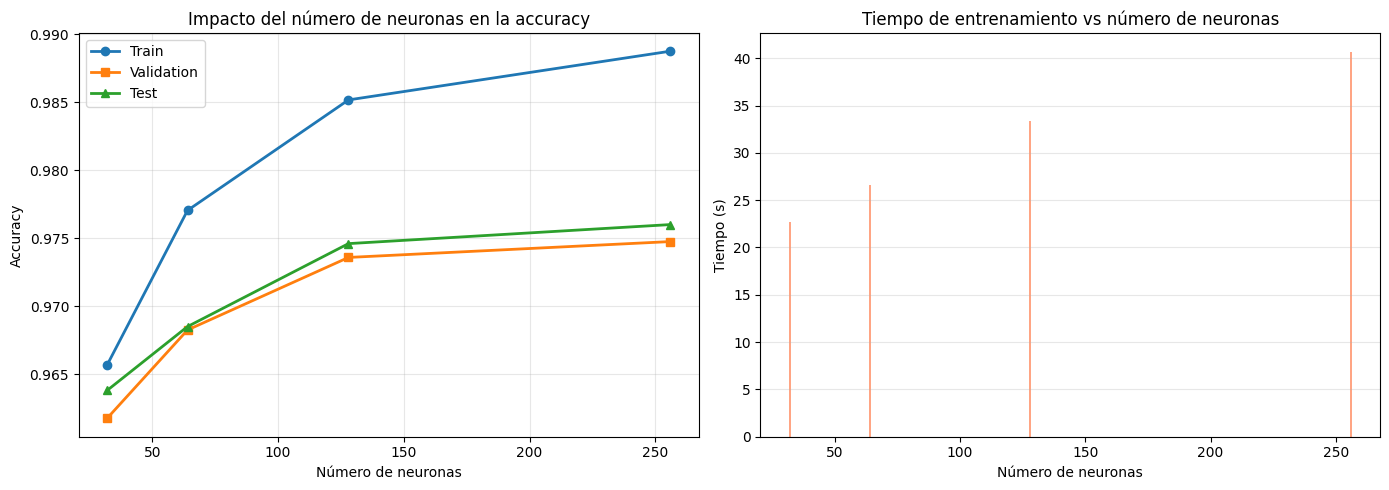

In [2]:
neurons_list = [32, 64, 128, 256]
results_neurons = {}

for n_neurons in neurons_list:
    print(f"Probando con {n_neurons} neuronas...")
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(n_neurons, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start = time.time()
    history = model.fit(xtrain, ytrain, epochs=5, verbose=0, validation_split=0.2)
    train_time = time.time() - start

    test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    results_neurons[n_neurons] = {
        'test_acc': test_acc,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_time': train_time,
        'history': history
    }
    print(f"  Train acc: {train_acc:.4f}, Val acc: {val_acc:.4f}, Test acc: {test_acc:.4f}, Tiempo: {train_time:.2f}s\n")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
neurons = list(results_neurons.keys())
train_accs = [results_neurons[n]['train_acc'] for n in neurons]
val_accs = [results_neurons[n]['val_acc'] for n in neurons]
test_accs = [results_neurons[n]['test_acc'] for n in neurons]

axes[0].plot(neurons, train_accs, marker='o', label='Train', linewidth=2)
axes[0].plot(neurons, val_accs, marker='s', label='Validation', linewidth=2)
axes[0].plot(neurons, test_accs, marker='^', label='Test', linewidth=2)
axes[0].set_xlabel('Número de neuronas')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Impacto del número de neuronas en la accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Tiempo de entrenamiento
times = [results_neurons[n]['train_time'] for n in neurons]
axes[1].bar(neurons, times, color='coral', alpha=0.7)
axes[1].set_xlabel('Número de neuronas')
axes[1].set_ylabel('Tiempo (s)')
axes[1].set_title('Tiempo de entrenamiento vs número de neuronas')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


---
## 2. Estudio del número de épocas

**¿Qué es?** Una época es una pasada completa del modelo sobre todo el conjunto de entrenamiento.

**¿Cómo afecta?**
- Pocas épocas: Underfitting, el modelo no aprende suficiente
- Épocas adecuadas: Convergencia óptima
- Demasiadas épocas: Sobreajuste, memorización de ruido

**Experimento:** Probaremos 1, 5, 10 y 20 épocas
---


Probando con 1 épocas...
  Train acc: 0.9169, Val acc: 0.9539, Test acc: 0.9534, Tiempo: 7.85s

Probando con 5 épocas...
  Train acc: 0.9844, Val acc: 0.9710, Test acc: 0.9718, Tiempo: 39.35s

Probando con 10 épocas...
  Train acc: 0.9950, Val acc: 0.9774, Test acc: 0.9794, Tiempo: 61.64s

Probando con 20 épocas...
  Train acc: 0.9991, Val acc: 0.9768, Test acc: 0.9802, Tiempo: 125.86s



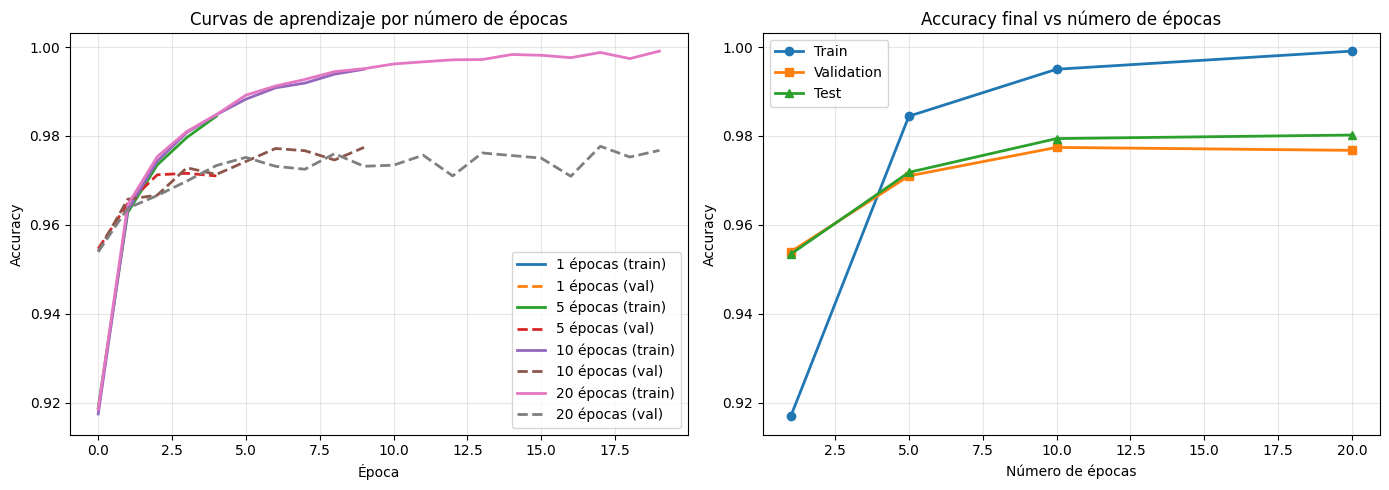

In [3]:
epochs_list = [1, 5, 10, 20]
results_epochs = {}

for n_epochs in epochs_list:
    print(f"Probando con {n_epochs} épocas...")
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start = time.time()
    history = model.fit(xtrain, ytrain, epochs=n_epochs, verbose=0, validation_split=0.2)
    train_time = time.time() - start

    test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    results_epochs[n_epochs] = {
        'test_acc': test_acc,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_time': train_time,
        'history': history
    }
    print(f"  Train acc: {train_acc:.4f}, Val acc: {val_acc:.4f}, Test acc: {test_acc:.4f}, Tiempo: {train_time:.2f}s\n")

# Visualización de curvas de aprendizaje
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Curvas de aprendizaje para cada número de épocas
for n_epochs in epochs_list:
    history = results_epochs[n_epochs]['history']
    axes[0].plot(history.history['accuracy'], label=f'{n_epochs} épocas (train)', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], '--', label=f'{n_epochs} épocas (val)', linewidth=2)

axes[0].set_xlabel('Época')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Curvas de aprendizaje por número de épocas')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Comparación de accuracy final
epochs = list(results_epochs.keys())
train_accs = [results_epochs[e]['train_acc'] for e in epochs]
val_accs = [results_epochs[e]['val_acc'] for e in epochs]
test_accs = [results_epochs[e]['test_acc'] for e in epochs]

axes[1].plot(epochs, train_accs, marker='o', label='Train', linewidth=2)
axes[1].plot(epochs, val_accs, marker='s', label='Validation', linewidth=2)
axes[1].plot(epochs, test_accs, marker='^', label='Test', linewidth=2)
axes[1].set_xlabel('Número de épocas')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy final vs número de épocas')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


---
## 3. Estudio de la función de pérdida

**¿Qué es?** Mide qué tan lejos están las predicciones de los valores reales. El objetivo es minimizarla.

**Tipos comunes:**
- **sparse_categorical_crossentropy**: Para clasificación multiclase con etiquetas enteras
- **binary_crossentropy**: Para clasificación binaria
- **mean_squared_error**: Para regresión

**Experimento:** Compararemos sparse_categorical_crossentropy vs mean_squared_error
---


Probando con función de pérdida Crossentropy...
  Train acc: 0.9852, Val acc: 0.9724, Test acc: 0.9730

Probando con función de pérdida MSE...
  Train acc: 0.9830, Val acc: 0.9722, Test acc: 0.9738



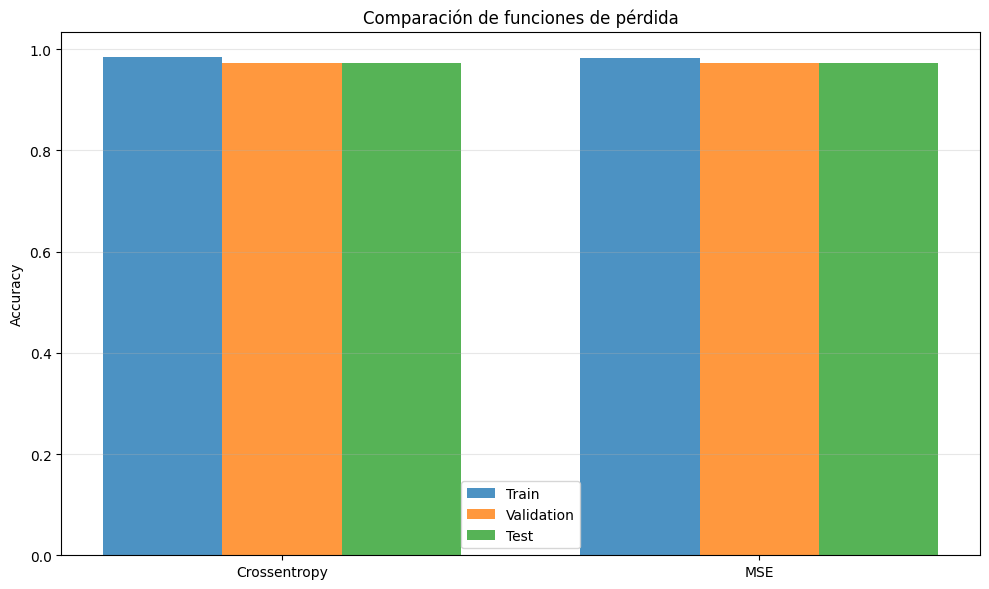

In [4]:
from tensorflow.keras.utils import to_categorical

# Convertir etiquetas a one-hot encoding para MSE
ytrain_onehot = to_categorical(ytrain, 10)
ytest_onehot = to_categorical(ytest, 10)

loss_functions = {
    'sparse_categorical_crossentropy': ('Crossentropy', ytrain, ytest),
    'mean_squared_error': ('MSE', ytrain_onehot, ytest_onehot)
}
results_loss = {}

for loss_fn, (name, y_train_data, y_test_data) in loss_functions.items():
    print(f"Probando con función de pérdida {name}...")
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

    start = time.time()
    history = model.fit(xtrain, y_train_data, epochs=5, verbose=0, validation_split=0.2)
    train_time = time.time() - start

    test_loss, test_acc = model.evaluate(xtest, y_test_data, verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    results_loss[name] = {
        'test_acc': test_acc,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_time': train_time,
        'history': history
    }
    print(f"  Train acc: {train_acc:.4f}, Val acc: {val_acc:.4f}, Test acc: {test_acc:.4f}\n")

# Visualización
names = list(results_loss.keys())
train_accs = [results_loss[n]['train_acc'] for n in names]
val_accs = [results_loss[n]['val_acc'] for n in names]
test_accs = [results_loss[n]['test_acc'] for n in names]

x = np.arange(len(names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, train_accs, width, label='Train', alpha=0.8)
ax.bar(x, val_accs, width, label='Validation', alpha=0.8)
ax.bar(x + width, test_accs, width, label='Test', alpha=0.8)

ax.set_ylabel('Accuracy')
ax.set_title('Comparación de funciones de pérdida')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



---
## 4. Estudio del tamaño de lote (batch size)

**¿Qué es?** Número de ejemplos procesados antes de actualizar los pesos.

**¿Cómo afecta?**
- Batch pequeño (16, 32): Actualizaciones frecuentes, más ruidoso, menos memoria
- Batch grande (128, 256): Actualizaciones estables, gradiente más preciso, más memoria

**Experimento:** Probaremos 16, 32, 64 y 128
---


Probando con batch size 16...
  Train acc: 0.9870, Val acc: 0.9754, Test acc: 0.9762, Tiempo: 55.29s

Probando con batch size 32...
  Train acc: 0.9853, Val acc: 0.9745, Test acc: 0.9730, Tiempo: 33.05s

Probando con batch size 64...
  Train acc: 0.9816, Val acc: 0.9733, Test acc: 0.9739, Tiempo: 19.13s

Probando con batch size 128...
  Train acc: 0.9760, Val acc: 0.9680, Test acc: 0.9711, Tiempo: 12.92s



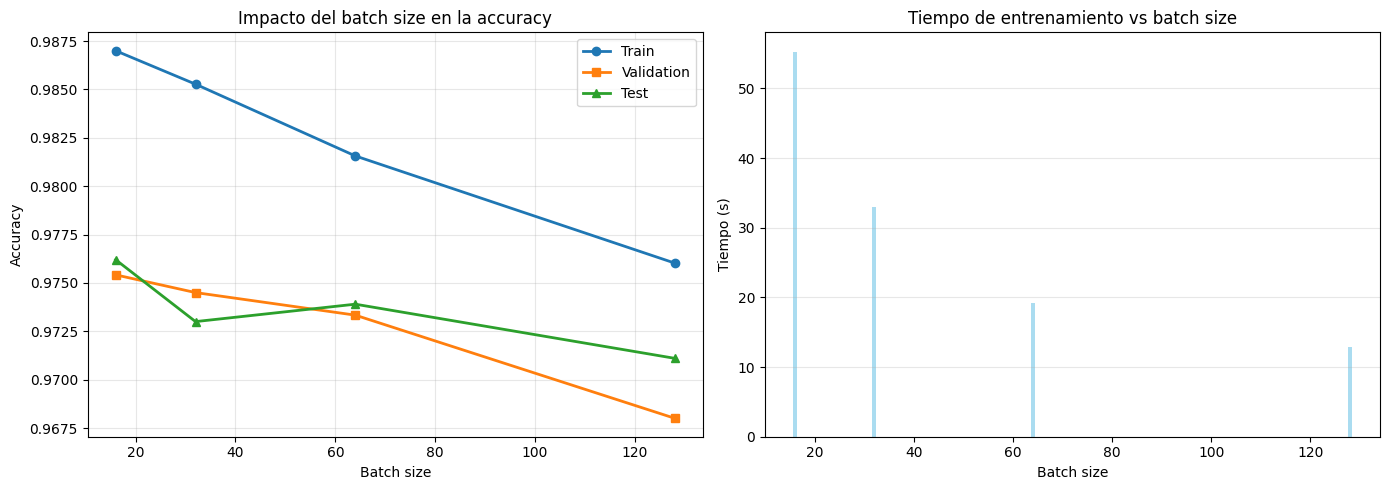

In [5]:
batch_sizes = [16, 32, 64, 128]
results_batch = {}

for batch in batch_sizes:
    print(f"Probando con batch size {batch}...")
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start = time.time()
    history = model.fit(xtrain, ytrain, epochs=5, batch_size=batch, verbose=0, validation_split=0.2)
    train_time = time.time() - start

    test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    results_batch[batch] = {
        'test_acc': test_acc,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_time': train_time,
        'history': history
    }
    print(f"  Train acc: {train_acc:.4f}, Val acc: {val_acc:.4f}, Test acc: {test_acc:.4f}, Tiempo: {train_time:.2f}s\n")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

batches = list(results_batch.keys())
train_accs = [results_batch[b]['train_acc'] for b in batches]
val_accs = [results_batch[b]['val_acc'] for b in batches]
test_accs = [results_batch[b]['test_acc'] for b in batches]
times = [results_batch[b]['train_time'] for b in batches]

# Accuracy
axes[0].plot(batches, train_accs, marker='o', label='Train', linewidth=2)
axes[0].plot(batches, val_accs, marker='s', label='Validation', linewidth=2)
axes[0].plot(batches, test_accs, marker='^', label='Test', linewidth=2)
axes[0].set_xlabel('Batch size')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Impacto del batch size en la accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Tiempo
axes[1].bar(batches, times, color='skyblue', alpha=0.7)
axes[1].set_xlabel('Batch size')
axes[1].set_ylabel('Tiempo (s)')
axes[1].set_title('Tiempo de entrenamiento vs batch size')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


---
## 5. Estudio de la tasa de aprendizaje (learning rate)

**¿Qué es?** Controla el tamaño de los pasos al actualizar los pesos.

**¿Cómo afecta?**
- Learning rate bajo (0.0001): Lento, estable, puede quedarse en mínimos locales
- Learning rate moderado (0.001, 0.01): Balance óptimo
- Learning rate alto (0.1+): Rápido pero inestable, puede no converger

**Experimento:** Probaremos 0.001, 0.01 y 0.1 con SGD
---


Probando con learning rate 0.001...
  Train acc: 0.8630, Val acc: 0.8794, Test acc: 0.8774

Probando con learning rate 0.01...
  Train acc: 0.9281, Val acc: 0.9352, Test acc: 0.9335

Probando con learning rate 0.1...
  Train acc: 0.9786, Val acc: 0.9706, Test acc: 0.9732



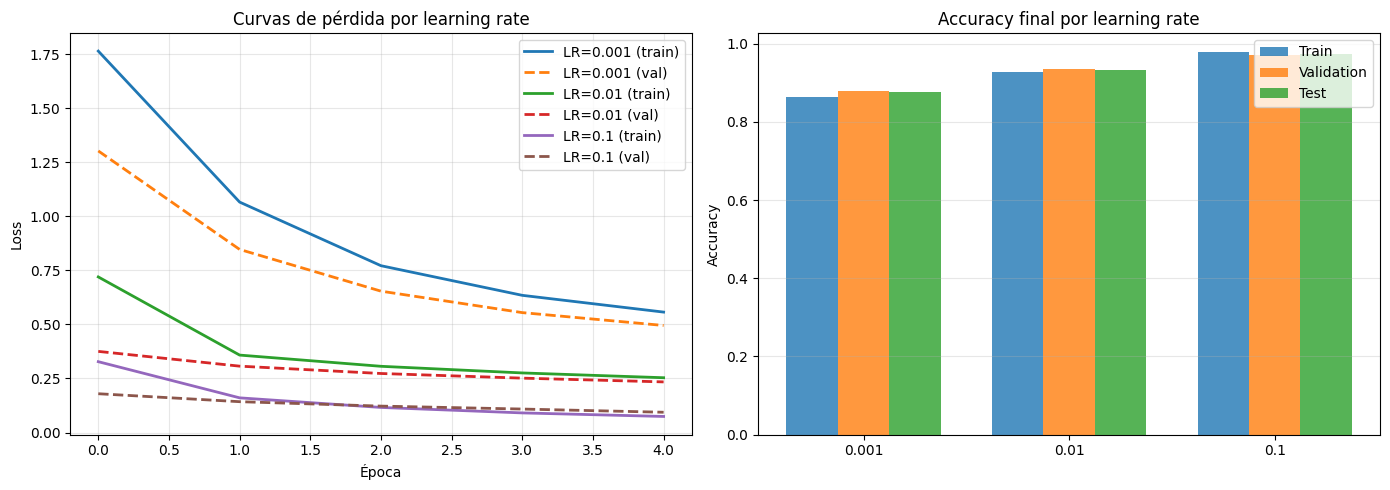

In [6]:
learning_rates = [0.001, 0.01, 0.1]
results_lr = {}

for lr in learning_rates:
    print(f"Probando con learning rate {lr}...")
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    history = model.fit(xtrain, ytrain, epochs=5, verbose=0, validation_split=0.2)
    train_time = time.time() - start

    test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]

    results_lr[lr] = {
        'test_acc': test_acc,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_time': train_time,
        'history': history
    }
    print(f"  Train acc: {train_acc:.4f}, Val acc: {val_acc:.4f}, Test acc: {test_acc:.4f}\n")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Curvas de aprendizaje
for lr in learning_rates:
    history = results_lr[lr]['history']
    axes[0].plot(history.history['loss'], label=f'LR={lr} (train)', linewidth=2)
    axes[0].plot(history.history['val_loss'], '--', label=f'LR={lr} (val)', linewidth=2)

axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].set_title('Curvas de pérdida por learning rate')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy final
lrs = list(results_lr.keys())
train_accs = [results_lr[lr]['train_acc'] for lr in lrs]
val_accs = [results_lr[lr]['val_acc'] for lr in lrs]
test_accs = [results_lr[lr]['test_acc'] for lr in lrs]

x = np.arange(len(lrs))
width = 0.25

axes[1].bar(x - width, train_accs, width, label='Train', alpha=0.8)
axes[1].bar(x, val_accs, width, label='Validation', alpha=0.8)
axes[1].bar(x + width, test_accs, width, label='Test', alpha=0.8)

axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy final por learning rate')
axes[1].set_xticks(x)
axes[1].set_xticklabels(lrs)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


---
## 6. Estudio del porcentaje de validación

**¿Qué es?** Fracción de datos de entrenamiento reservada para validación.

**¿Cómo afecta?**
- Sin validación (0%): No se puede monitorizar sobreajuste
- Validación pequeña (5-10%): Poca información, más datos para entrenar
- Validación adecuada (15-20%): Balance óptimo
- Validación grande (30%+): Menos datos para entrenar

**Experimento:** Probaremos 0%, 10%, 20% y 30%
---


Probando con validation_split 0.0...
  Train acc: 0.9855, Val acc: N/A, Test acc: 0.9746

Probando con validation_split 0.1...
  Train acc: 0.9851, Val acc: 0.9771666526794434, Test acc: 0.9760

Probando con validation_split 0.2...
  Train acc: 0.9847, Val acc: 0.972000002861023, Test acc: 0.9731

Probando con validation_split 0.3...
  Train acc: 0.9849, Val acc: 0.9719444513320923, Test acc: 0.9741



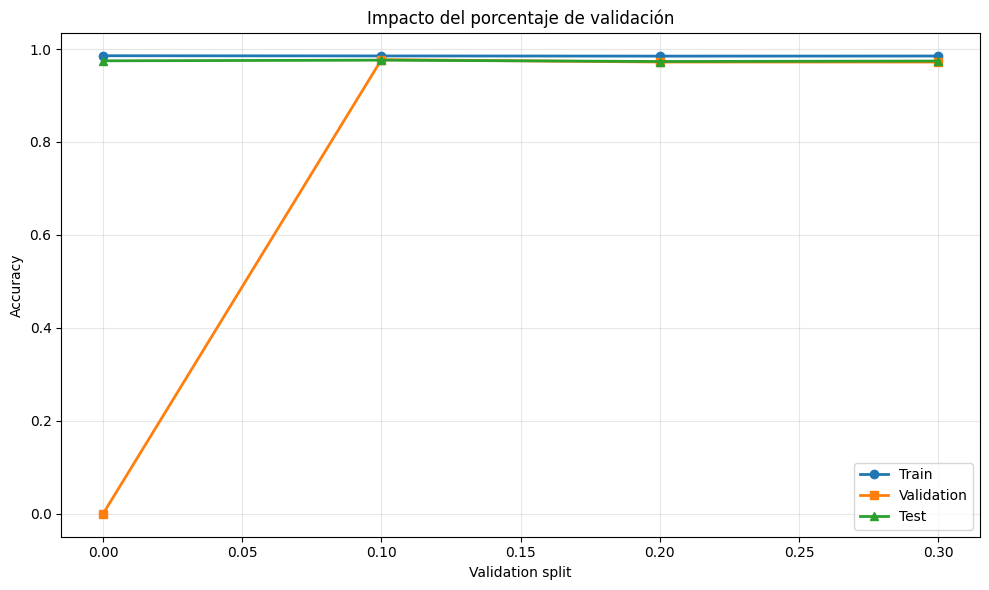

In [7]:
val_splits = [0.0, 0.1, 0.2, 0.3]
results_val = {}

for val_split in val_splits:
    print(f"Probando con validation_split {val_split}...")
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start = time.time()
    history = model.fit(xtrain, ytrain, epochs=5, verbose=0, validation_split=val_split)
    train_time = time.time() - start

    test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1] if val_split > 0 else None

    results_val[val_split] = {
        'test_acc': test_acc,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'train_time': train_time,
        'history': history
    }
    print(f"  Train acc: {train_acc:.4f}, Val acc: {val_acc if val_acc else 'N/A'}, Test acc: {test_acc:.4f}\n")

# Visualización
val_splits_plot = list(results_val.keys())
train_accs = [results_val[v]['train_acc'] for v in val_splits_plot]
val_accs = [results_val[v]['val_acc'] if results_val[v]['val_acc'] else 0 for v in val_splits_plot]
test_accs = [results_val[v]['test_acc'] for v in val_splits_plot]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(val_splits_plot, train_accs, marker='o', label='Train', linewidth=2)
ax.plot(val_splits_plot, val_accs, marker='s', label='Validation', linewidth=2)
ax.plot(val_splits_plot, test_accs, marker='^', label='Test', linewidth=2)
ax.set_xlabel('Validation split')
ax.set_ylabel('Accuracy')
ax.set_title('Impacto del porcentaje de validación')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


---
## 7. Clasificación Par/Impar

Adaptamos el modelo para clasificar dígitos pares (0, 2, 4, 6, 8) vs impares (1, 3, 5, 7, 9).

**Cambios necesarios:**
1. Transformar etiquetas a binario (0=par, 1=impar)
2. Cambiar capa de salida: 1 neurona con sigmoid
3. Cambiar función de pérdida: binary_crossentropy
4. Añadir capas y Dropout para mejorar rendimiento
---


Distribución de clases:
Train - Pares: 29492, Impares: 30508
Test - Pares: 4926, Impares: 5074

--- Modelo básico ---
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9111 - loss: 0.2193 - val_accuracy: 0.9685 - val_loss: 0.0946
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9735 - loss: 0.0748 - val_accuracy: 0.9751 - val_loss: 0.0743
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0549 - val_accuracy: 0.9792 - val_loss: 0.0653
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0410 - val_accuracy: 0.9829 - val_loss: 0.0553
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0314 - val_accuracy: 0.9809 - val_loss: 0.0598
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0286 - val_accuracy: 0.9813 - val_loss: 0.0613
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9932 - loss: 0.0204 - val_accuracy

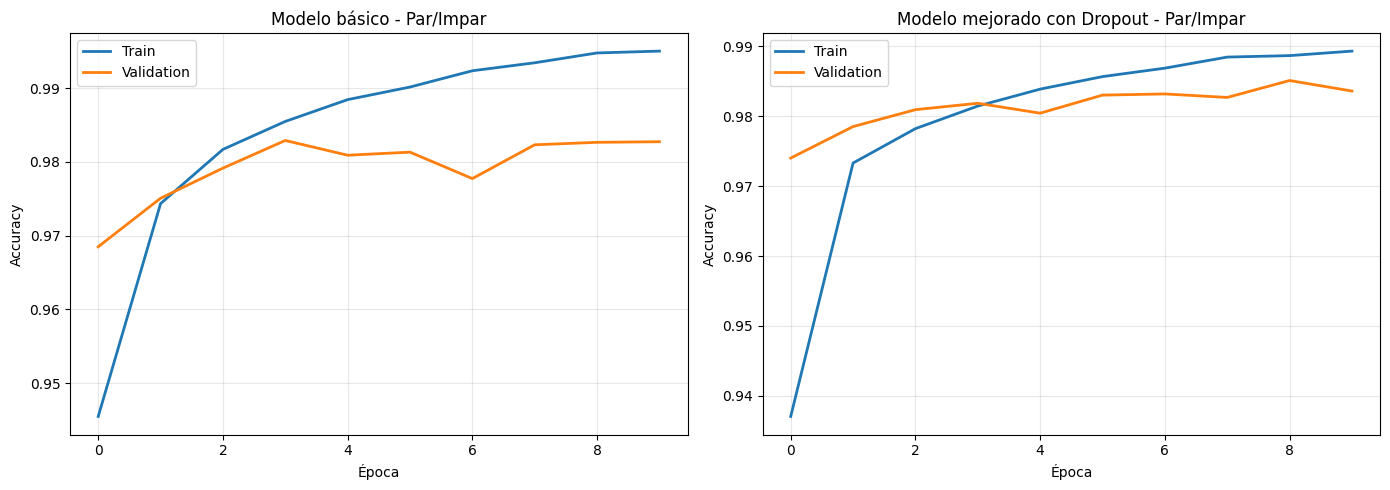

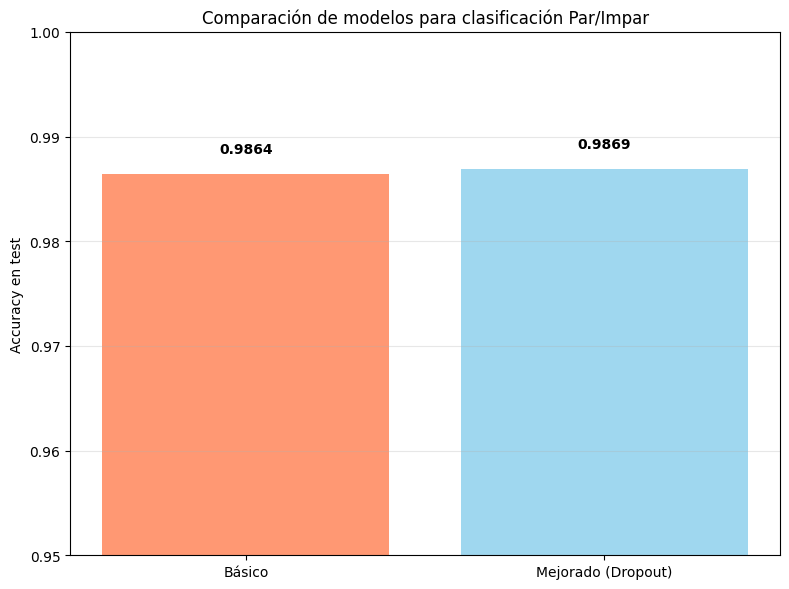

In [8]:
# Transformar etiquetas
ytrain_par_impar = (ytrain % 2).astype(int)
ytest_par_impar = (ytest % 2).astype(int)

print("Distribución de clases:")
print(f"Train - Pares: {np.sum(ytrain_par_impar == 0)}, Impares: {np.sum(ytrain_par_impar == 1)}")
print(f"Test - Pares: {np.sum(ytest_par_impar == 0)}, Impares: {np.sum(ytest_par_impar == 1)}")

# Modelo básico
print("\n--- Modelo básico ---")
model_par_impar = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_par_impar.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

history_par_impar = model_par_impar.fit(xtrain, ytrain_par_impar,
                                       epochs=10, batch_size=32,
                                       validation_split=0.2, verbose=1)

test_loss_par_impar, test_acc_par_impar = model_par_impar.evaluate(xtest, ytest_par_impar)
print(f"\nAccuracy en test (modelo básico): {test_acc_par_impar:.4f}")

# Modelo mejorado con Dropout
print("\n--- Modelo mejorado con Dropout ---")
model_par_impar_mejorado = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_par_impar_mejorado.compile(optimizer='adam',
                                 loss='binary_crossentropy',
                                 metrics=['accuracy'])

history_par_impar_mejorado = model_par_impar_mejorado.fit(xtrain, ytrain_par_impar,
                                                         epochs=10, batch_size=64,
                                                         validation_split=0.2, verbose=1)

test_loss_mejorado, test_acc_mejorado = model_par_impar_mejorado.evaluate(xtest, ytest_par_impar)
print(f"\nAccuracy en test (modelo mejorado): {test_acc_mejorado:.4f}")

# Comparación visual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Curvas de aprendizaje modelo básico
axes[0].plot(history_par_impar.history['accuracy'], label='Train', linewidth=2)
axes[0].plot(history_par_impar.history['val_accuracy'], label='Validation', linewidth=2)
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Modelo básico - Par/Impar')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Curvas de aprendizaje modelo mejorado
axes[1].plot(history_par_impar_mejorado.history['accuracy'], label='Train', linewidth=2)
axes[1].plot(history_par_impar_mejorado.history['val_accuracy'], label='Validation', linewidth=2)
axes[1].set_xlabel('Época')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Modelo mejorado con Dropout - Par/Impar')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparación final
models_comparison = {
    'Básico': test_acc_par_impar,
    'Mejorado (Dropout)': test_acc_mejorado
}

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(models_comparison.keys(), models_comparison.values(), color=['coral', 'skyblue'], alpha=0.8)
ax.set_ylabel('Accuracy en test')
ax.set_title('Comparación de modelos para clasificación Par/Impar')
ax.set_ylim([0.95, 1.0])
ax.grid(True, alpha=0.3, axis='y')
for i, (name, acc) in enumerate(models_comparison.items()):
    ax.text(i, acc + 0.002, f'{acc:.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


* * *
## 8. Resumen y Conclusiones de los Experimentos

Hemos realizado una serie de experimentos para entender el impacto de varios hiperparámetros en el rendimiento de un modelo de red neuronal simple para clasificar dígitos MNIST y para la tarea de clasificación par/impar. A continuación, se resumen las conclusiones clave de cada experimento:

### Número de neuronas en la capa oculta
- Los resultados muestran que aumentar el número de neuronas generalmente mejora la precisión hasta cierto punto.
- Con 32 neuronas, la precisión en test es del 96.38%.
- Aumentando a 128 neuronas, la precisión en test sube a 97.46%.
- Un mayor número de neuronas (256) solo proporciona una mejora marginal (97.60%) pero aumenta significativamente el tiempo de entrenamiento.
- Para la tarea de clasificación par/impar, 64 neuronas en la primera capa oculta del modelo básico ya ofrecieron un buen rendimiento.
- **Conclusión:** 128 neuronas en la capa oculta parece ofrecer un buen equilibrio entre rendimiento y tiempo de entrenamiento para la clasificación original de MNIST. Para tareas más sencillas como par/impar, menos neuronas pueden ser suficientes.

### Número de épocas
- El número de épocas afecta directamente el tiempo de entrenamiento y la convergencia del modelo.
- Con 1 época, la precisión es baja (95.34%).
- Aumentar a 5 épocas mejora considerablemente la precisión (97.18%).
- Con 10 y 20 épocas, la precisión en test sigue mejorando ligeramente (97.94% y 98.02% respectivamente), pero el tiempo de entrenamiento se incrementa notablemente.
- Las curvas de aprendizaje muestran que después de 10 épocas, la mejora en la validación es mínima, sugiriendo una posible saturación o inicio de sobreajuste.
- **Conclusión:** 10 épocas parece ser un buen compromiso para este modelo y dataset, ofreciendo una alta precisión sin un tiempo de entrenamiento excesivo. Es crucial monitorizar la curva de validación para detener el entrenamiento antes si se observa sobreajuste.

### Función de pérdida
- La elección de la función de pérdida es fundamental y depende del tipo de problema.
- `sparse_categorical_crossentropy` es la función adecuada para clasificación multiclase con etiquetas enteras, obteniendo una alta precisión (97.30%).
- `mean_squared_error` no es apropiada para este problema de clasificación, aunque el modelo logró una precisión comparable (97.38%) después de convertir las etiquetas a one-hot, `sparse_categorical_crossentropy` es teóricamente más correcta y común para este tipo de tareas.
- Para la clasificación binaria par/impar, `binary_crossentropy` es la función de pérdida correcta, y el modelo mejorado con Dropout logró una precisión de 98.69%.
- **Conclusión:** Utilizar la función de pérdida correcta (`sparse_categorical_crossentropy` para multiclase, `binary_crossentropy` para binaria) es esencial para un rendimiento óptimo y una interpretación correcta de la métrica de pérdida.

### Tamaño de lote (Batch size)
- El tamaño del lote influye en la estabilidad del entrenamiento y el tiempo por época.
- Lotes pequeños (16, 32) tienden a tener gradientes más ruidosos pero pueden converger a mejores mínimos. Obtuvieron precisiones de 97.62% y 97.30%.
- Lotes más grandes (64, 128) tienen gradientes más estables y son más rápidos por época. Obtuvieron precisiones de 97.39% y 97.11%.
- Hay un trade-off entre estabilidad/rapidez y la posibilidad de encontrar mejores mínimos.
- **Conclusión:** Un tamaño de lote de 32 o 64 parece ofrecer un buen equilibrio entre velocidad y precisión para la clasificación original de MNIST. Para el modelo mejorado de par/impar se utilizó 64 obteniendo buenos resultados.

### Tasa de aprendizaje (Learning rate)
- La tasa de aprendizaje determina el tamaño de los pasos durante la optimización. Se experimentó con el optimizador SGD para mostrar el efecto de este hiperparámetro.
- Una tasa de aprendizaje muy baja (0.001) resulta en un entrenamiento lento y baja precisión (87.74%).
- Una tasa moderada (0.01) mejora significativamente la precisión (93.35%).
- Una tasa más alta (0.1) puede ser inestable, aunque en este caso logró una precisión alta (97.32%), las curvas de pérdida pueden mostrar más fluctuaciones.
- Es importante notar que con el optimizador Adam (utilizado en otros experimentos con su tasa de aprendizaje por defecto de 0.001), se lograron precisiones aún mayores.
- **Conclusión:** La elección de la tasa de aprendizaje es crítica. Una tasa demasiado baja es lenta, una demasiado alta puede ser inestable. Optimizarla, o usar optimizadores adaptativos como Adam con su configuración por defecto, suele ser la mejor práctica.

### Porcentaje de validación
- El conjunto de validación es vital para monitorizar el entrenamiento y detectar sobreajuste.
- Sin validación (0%), no se puede evaluar el rendimiento durante el entrenamiento ni detectar sobreajuste.
- Un porcentaje de validación adecuado (10-20%) permite una buena monitorización sin reducir drásticamente el tamaño del conjunto de entrenamiento. Los resultados de precisión en test fueron similares (97.60% para 10%, 97.31% para 20%).
- Un porcentaje mayor (30%) reduce la cantidad de datos para el entrenamiento, lo que podría impactar ligeramente el rendimiento final (97.41%).
- **Conclusión:** Un porcentaje de validación entre 15% y 20% es generalmente recomendado para monitorizar eficazmente el proceso de entrenamiento.

### Configuración Óptima Sugerida (Basada en los Experimentos)
Considerando los resultados de los experimentos, una buena configuración general para clasificar dígitos MNIST con un modelo similar podría ser:

- **Arquitectura**: Capa `Flatten`, seguida de una capa `Dense` con **128 neuronas** y activación 'relu', y una capa de salida `Dense` con 10 neuronas y activación 'softmax'. Para tareas binarias como par/impar, una arquitectura con **dos capas Dense (128 y 64 neuronas) y Dropout (0.3)** en cada capa oculta demostró ser robusta.
- **Número de Épocas**: Alrededor de **10 épocas**, monitorizando siempre la pérdida y precisión en el conjunto de validación para detener el entrenamiento si es necesario (Early Stopping podría ser útil).
- **Función de Pérdida**: **`sparse_categorical_crossentropy`** para la clasificación multiclase original. **`binary_crossentropy`** para la clasificación par/impar.
- **Tamaño de Lote (Batch Size)**: **32 o 64** ofrece un buen balance.
- **Optimizador**: **Adam** con su tasa de aprendizaje por defecto (0.001) ha demostrado ser muy efectivo. Si se usa SGD, una tasa de aprendizaje de **0.01** parece un buen punto de partida.
- **Porcentaje de Validación**: **0.2 (20%)** es un valor adecuado para monitorizar el entrenamiento.

El estudio de hiperparámetros es un proceso iterativo y los valores óptimos pueden variar ligeramente dependiendo de la arquitectura específica del modelo y el dataset. Sin embargo, estos experimentos proporcionan una base sólida para entender cómo cada uno afecta el rendimiento y guiar la elección de configuraciones. El modelo mejorado con Dropout para la clasificación par/impar demostró la importancia de técnicas de regularización para mejorar la generalización.